<a href="https://colab.research.google.com/github/kiranjadhav1377/Netflix_Movies_and_Tv_shows_Clustering/blob/main/RAW_Netflix_project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Netflix Movies and Tv shows Clustering**



**Project Type -** Unsupervised

**Contribution -** Individual

**Team Member -** Kiran S. Jadhav

photo-1574375927938-d5a98e8ffe85.avif

# **Project Summary -**

This project is like a Netflix makeover! We're delving into Netflix's massive collection of movies and TV shows, which is like a treasure trove of entertainment. Our goal? To organize them into neat groups that just make Netflix more awesome for you and keep you coming back for more.

We start with a bunch of informationlike 7,787 records worth each with details about who's in the show, where it's from, its type (comedy, action, etc.), the director, rating, and a short description. We make sure everything is complete and no details are missing.

Now, here comes the techy part: we use something called TFIDF to turn all this info into computer-friendly numbers. It's like giving each show a special code. And to keep things simple, we use PCA to crunch down these numbers.

Our next mission is to group similar shows together, creating these awesome categories. To figure out how many categories we need, we try different methods, like looking at graphs and scores. We have two cool ways of making these groups: one is called K-Means, and the other is like making a family tree of shows, called Agglomerative Hierarchical.

After all that, we create a special chart showing how much one show is like another. It's like making a map of show similarities. This helps us build a super-smart system that suggests new things you might love based on what you've enjoyed before.

In the end, this project is all about giving Netflix a glow-up. We're organizing its shows and movies into neat groups and suggesting awesome new things for you based on what you already enjoy. It's like making Netflix your personalized entertainment paradise.

# **GitHub Link -**

https://github.com/kiranjadhav1377/Netflix_Movies_and_Tv_shows_Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
My Task is to make a Model that can cluster similar type of content together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [73]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [74]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
file_path = '/content/drive/My Drive/Colab Notebooks/my projects/NETFLIX/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)


### Dataset First View

In [76]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [77]:
# Dataset Rows & Columns count
print(df.columns)
rows = df.shape[0]
columns = df.shape[1]
print (f'The rows are {rows} and The  columns sre {columns} ')

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
The rows are 7787 and The  columns sre 12 


### Dataset Information

In [78]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [79]:
# Dataset Duplicate Value Count
print ( f'In this Dataset there are {len(df[df.duplicated()])} duplicate values')

In this Dataset there are 0 duplicate values


#### Missing Values/Null Values

In [80]:
# Missing Values/Null Values Count
Null_count = df.isnull().sum()
Null_count

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

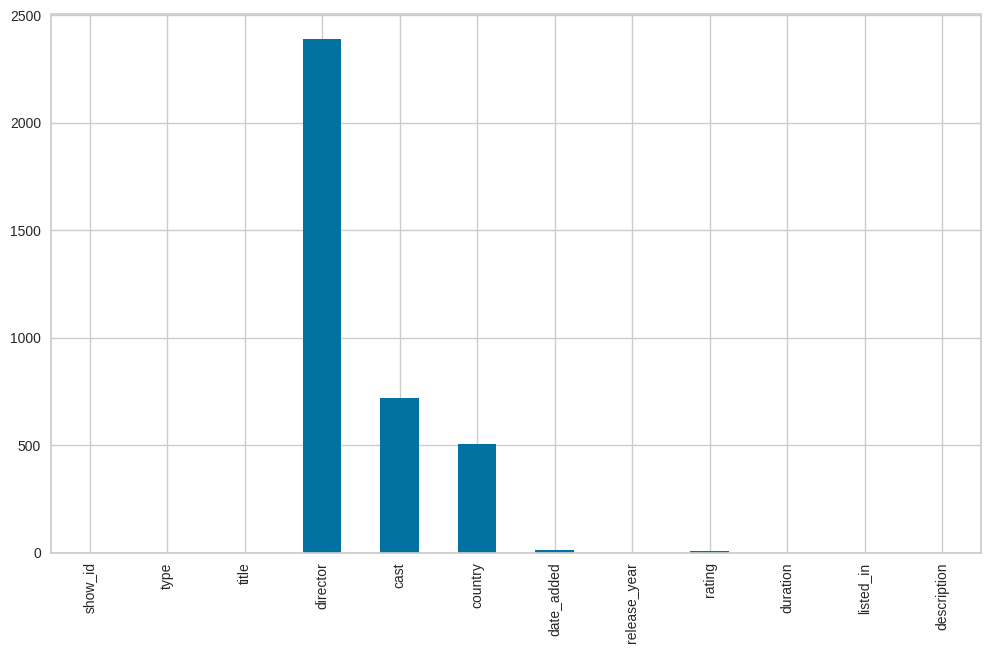

In [81]:
# Visualizing the missing values
df.isnull().sum().plot.bar()
plt.show()

### What did you know about your dataset?

This huge list of 7,787 Netflix shows and movies, each with its own special ID, like "s1" or "s2." We know if it's a TV show or a movie.

For each show, we have details like its name ("Rich in Love"), who directed it, and who's in it. There are shows from 681 different countries, and we know when they were added to Netflix, their release year, and how they're rated.

These shows come in 419 different types, like foreign TV shows, romantic comedies, and thrillers. We also know there are 216 different descriptions and how long each season lasts in minutes.

Good news: there are no copies of the same show in our list. But, there are some missing details in some shows:

We don't know who directed 2,389 shows. For 718 shows, we don't know who the actors are. The country where 507 shows are from is a mystery. We're missing the date for 10 shows. And, we don't have ratings for 7 shows. We're going to use all this info to figure out what people really like on Netflix.

## ***2. Understanding Your Variables***

In [82]:
# Dataset Columns

print(f'there are { df.shape[1]} columns and they are as follow {df.columns}')

there are 12 columns and they are as follow Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [83]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

This big list with 7,787 items, and each item has 12 pieces of info. Let me break it down:

1.   Show ID (Show_id): A special code for each thing in our list.

2.   Type (type): Tells us if it's a movie or a TV show.

3.   Title (title): The name of the movie or TV show.

4.   Director (director): The person who directed the movie or show.

5.   Cast (cast): The actors and actresses in the movie or show.

6.   Country (country): The country where the movie or show comes from.

7.   Date Added (date_added): When the movie or show was added to Netflix.

8.   Release Year (release_year): The year the movie or show was first shown.

9.   Rating (rating): How good people think the movie or show is.

10.  Duration (duration): How long the movie or show lasts.

11.  Listed In (listed_in): The category the movie or show is put in.

12.  Description (description): A little summary or explanation of what the movie or show is about.

So, in a nutshell, we've got a bunch of cool details about a bunch of awesome movies and TV shows.

### Check Unique Values for each variable.

In [84]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [85]:
# Write your code to make your dataset analysis ready
# Netflix Wrangling Class for data wrangling
class NetflixWrangling:
    # Init function
    def __init__(self,df):
      ''' init method '''
      try:
          self.df = df.copy()
          self.df['duration_value'] = self.df['duration'].apply(self.set_duration_value)
          self.df['duration_unit'] = self.df['duration'].apply(self.set_duration_unit)
          self.cast_ = self.get_cast_or_listed_in('cast')
          self.genres_ = self.get_cast_or_listed_in('listed_in')
          self.directors_ = self.getTopValues('director')
          self.countries_ = self.getTopValues('country')
          self.release_years_ = self.getTopValues('release_year')
          self.ratings_ = self.getTopValues('rating')
          self.df['duration_value'] = self.df['duration_value'].apply(lambda x:int(x))

      except:
          print('Invalid input!')
    # Function to get dataset
    def get_df(self):
      ''' Function returns dataframe '''
      return self.df
    # Function to get movies dataset
    def getMovies(self):
      ''' Function returns returns dataframe which contains data of movies '''
      return self.df[self.df['type'] == 'Movie']
    # Function to get TV Show's dataset
    def getTvShows(self):
      ''' Function returns dataframe which contains data of tv shows '''
      return self.df[self.df['type'] == 'TV Show']
    # Function to get top values
    def getTopValues(self,col):
      ''' Function returns top values for the given column '''
      try:
          return self.df[col].value_counts().sort_values(ascending=False)
      except:
          return 'You have entered invalid column!'
    # Function to set duration value
    def set_duration_value(self,string):
      ''' Function for setting duration values '''
      if string[-7:] == 'Seasons':
        return string[:-8]
      elif string[-6:] == 'Season':
        return string[:-7]
      else:
        return string[:-4]

    # Function to set duration unit
    def set_duration_unit(self,duration):
      ''' function for setting duration unit. '''
      if (duration[-7:] == 'Seasons') | (duration[-6:] == 'Season'):
        return 'season'
      else:
        return 'min'

    # Function to get cast or genres
    def get_cast_or_listed_in(self,col):
        df = self.df.copy()
        # internal function 1
        def __get_list():
            '''
            takes dataset and column's name, returns list.
            '''
            list_1=[]
            for i in df[df[col].isna()== False][col]:
                list_1.append(i.split(', '))
            return list_1
          # internal function 2
        def __get_list_vars(list_1):
            list_2 = []
            for i in list_1:
              for j in i:
                list_2.append(j)
            return list_2

          # internal function 3
        def __get_dict_vars(list_2):
            unique_var = set(list_2)
            dict_of_vars = dict()
            for i in unique_var:
              dict_of_vars[i] = list_2.count(i)
            return dict_of_vars
        # Assigning values in list 1 and list 2 then returning the series
        list_1 = __get_list()
        list_2 = __get_list_vars(list_1)
        return pd.Series(__get_dict_vars(list_2)).sort_values(ascending=False)

    # Function for converting duration_value into int type
    def convertInt(self,col):
      ''' Function to convert other type into integer '''
      return int(col)

    # Get showsPerMonth
    def getShowsPerMonth(self,typ='all'):
      ''' Function which returns Shows per month '''
      df = pd.DataFrame()
      if typ == 'tv':
          df = self.getTvShows()
      elif typ == 'movie':
          df = self.getMovies()
      else:
          df = self.df.copy()
      df = df[df['date_added'].isna() == False]
      df['added_month'] = df['date_added'].apply(lambda x:x.split()[0])
      monthly_shows = df['added_month'].value_counts()
      return monthly_shows

    # Get Text Length
    def getTextLength(self,text):
      return len(text)
    # Get Dataframe with length column
    def getDfWithLength(self,col):
      df = self.df.copy()
      df['text_length'] = df[col].apply(self.getTextLength)
      return df

# Initializing the object
netflixWrangling = NetflixWrangling(df)

In [86]:
df["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [87]:
# top count of show from top ten country
df["country"].value_counts().head(10)

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

In [88]:
# Printing the shapes for each type of shows
print('Data for Movies has shape :',netflixWrangling.getMovies().shape)
print('')
print('Data for TV shows has shape :',netflixWrangling.getTvShows().shape)
print('')

Data for Movies has shape : (5377, 14)

Data for TV shows has shape : (2410, 14)



In [89]:
# Total length for each type of durations
netflixWrangling.get_df().groupby(['duration_unit'])['duration_value'].sum()

duration_unit
min       533979
season      4280
Name: duration_value, dtype: int64

In [90]:
# Total number of Shows for each month
print('Total number of Shows for each month')
netflixWrangling.getShowsPerMonth()

Total number of Shows for each month


December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: added_month, dtype: int64

In [91]:
# Total number of Movies for each month
print('Total number of Movies for each month')
netflixWrangling.getShowsPerMonth('movie')

Total number of Movies for each month


January      560
December     554
October      553
November     511
March        471
April        420
September    415
August       414
July         403
June         377
May          371
February     328
Name: added_month, dtype: int64

In [92]:
# Total number of TV Shows for each month
print('Total number of TV Shows for each month')
netflixWrangling.getShowsPerMonth('tv')

Total number of TV Shows for each month


December     279
October      232
November     227
August       204
September    204
March        198
July         197
January      197
April        181
May          172
June         165
February     144
Name: added_month, dtype: int64

In [93]:
# Assigning top 5 actors and genres to a variable
print('Top 5 actors with highest number of shows :')
netflixWrangling.cast_.head()

Top 5 actors with highest number of shows :


Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
dtype: int64

In [94]:
# Top 5 directors with highest number of shows
print('Top 5 directors with highest number of shows :')
netflixWrangling.directors_.head()

Top 5 directors with highest number of shows :


Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Name: director, dtype: int64

In [95]:
# Top 5 countries with highest number of shows
print('Top 5 countries with highest number of shows :')
netflixWrangling.countries_.head()

Top 5 countries with highest number of shows :


United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64

In [96]:
# Top 5 years with highest number of shows released
print('Top 5 years with highest number of shows released:')
netflixWrangling.release_years_.head()

Top 5 years with highest number of shows released:


2018    1121
2017    1012
2019     996
2016     882
2020     868
Name: release_year, dtype: int64

In [97]:
# Top ratings with highest number of shows
print('Top ratings with highest number of shows :')
netflixWrangling.ratings_

Top ratings with highest number of shows :


TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [98]:
# Top 5 Genres with highest number of Movies/TV Shows
print('Top 5 Genres with highest number of Movies/TV Shows')
netflixWrangling.genres_.head()

Top 5 Genres with highest number of Movies/TV Shows


International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
dtype: int64

In [99]:
# Top 10 directors with highest length of descriptions
print('Top 10 Directors with highest length of descriptions')
netflixWrangling.getDfWithLength('description').groupby('director')['text_length'].mean().sort_values(ascending=False).reset_index().head(10)

Top 10 Directors with highest length of descriptions


,director,text_length
0,Chia Tang,246.0
1,Gene Quintano,244.0
2,Chris Koch,243.0
3,N. Chandra,241.0
4,Daniel Lee,240.0
5,Kevin Reynolds,239.0
6,Jeffrey W. Byrd,231.0
7,Marek Kanievska,230.0
8,Shawn Arranha,221.0
9,Esteban Sapir,220.0


### What all manipulations have you done and insights you found?

I started the analysis by organizing the dataset, sorting movie data into one category and TV show data into another. To make data extraction smoother, I created a specialized class for handling text information and implemented two functions specifically designed to capture duration values and units.

Here are some key findings from digging into the dataset:

*  Director Insights:

Identified top directors with the most movies or TV shows, highlighting Raúl Campos and Jan Suter as the leaders with a combined total of 18 productions.

*  Top Movie-Producing Countries:

Explored and documented the top 5 countries contributing the most movies, with the United States leading, followed by India, the United Kingdom, Japan, and South Korea.
*  Movies Produced in Specific Year:

Found that the peak number of movies (1121) were produced in the year 2018.

*  Top Movie Ratings:

Investigated the distribution of ratings, pinpointing "TV-MA" as the category associated with the highest number of movies (2863).

*  Top Actors by Movie Count:

Disclosed the top 5 actors with the highest count of movies, featuring Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, Om Puri, and Akshay Kumar.

*  Top Genres:

Explored genres and identified "International Movies" and "Dramas" as the leading categories, with 2437 and 2106 movies, respectively.

*  TV Show Statistics:

Provided aggregated counts for TV show seasons (4280) and total viewing minutes (533,979).

*  Monthly Distribution of TV Shows/Movies:

Presented a breakdown of TV shows and movies released each month, highlighting December with the highest count (833), followed by October and January.

These insights collectively provide a comprehensive overview of the dataset, revealing patterns across directors, countries, years, ratings, actors, genres, and monthly releases. This analysis forms a solid foundation for a more in-depth understanding of the dataset's intricate characteristics.

**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [115]:
# Handling Missing Values & Missing Value Imputation
df_copy = df.copy()
df_copy['cast'] = df_copy['cast'].fillna('unknown cast')
df_copy['country'] = df_copy['country'].fillna('unknown country')
df_copy.drop(columns=['director'],inplace=True)
df_copy = df_copy.dropna()

#### What all missing value imputation techniques have you used and why did you use those techniques?


I addressed missing values in the "cast" and "country" columns by substituting them with the placeholder "unknown." Afterward, to improve data cleanliness and completeness, I removed rows that had 10 or fewer NaN values.

### 2. Handling Outliers

Before outlier treatment


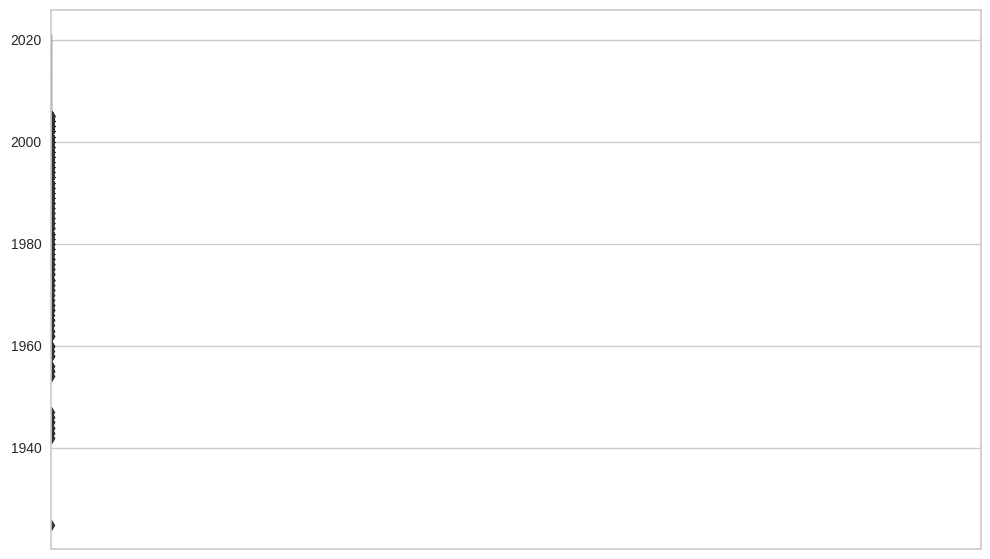

After iteration 1


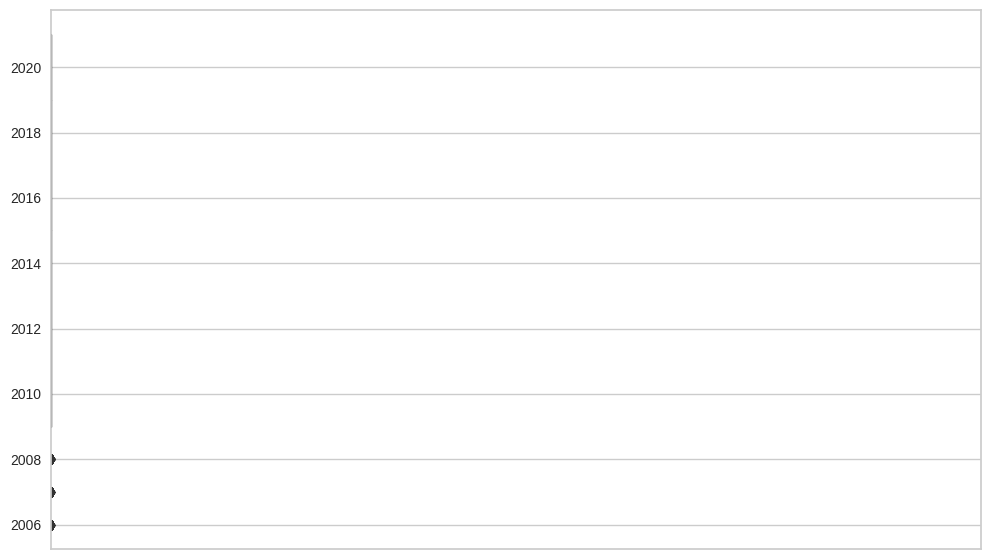

After iteration 2


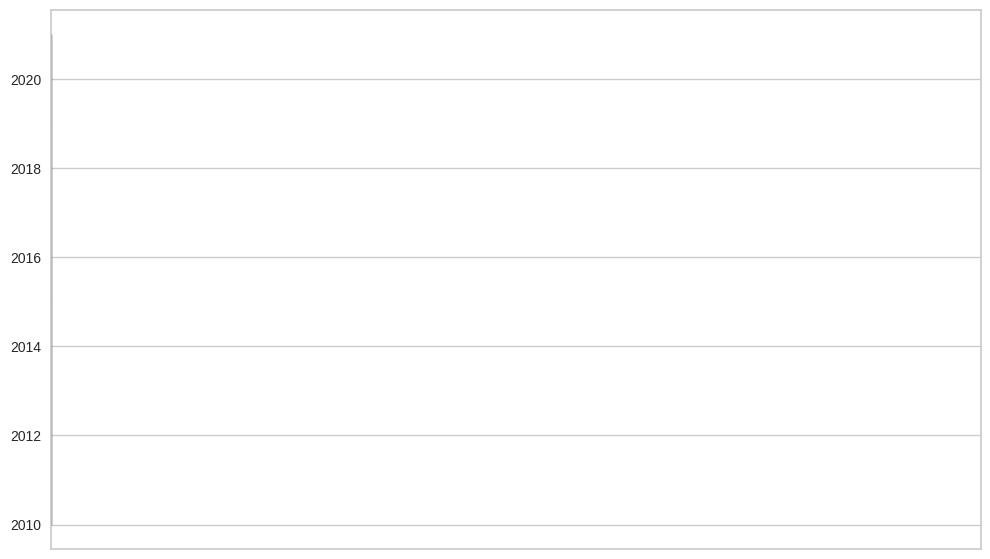

In [116]:
# Handling Outliers & Outlier treatments
# Function for displaying outliers
def displayOutliers():
  ''' This function display outliers '''
  sns.boxplot(df_copy['release_year'])
  plt.xticks(np.arange(1920,2031,10))
  plt.show()

# Function for outlier treatment
def treatOutliers(df_copy):
  ''' Function takes dataset and returns a dataset after treating the outliers '''
  q1 = df_copy['release_year'].quantile(.25)
  q3 = df_copy['release_year'].quantile(.75)
  iqr = q3-q1
  lower = q1-1.5*(iqr)
  df_copy = df_copy[df_copy['release_year'] > lower]
  return df_copy

# Treating the outlier by applying the above function
print('Before outlier treatment')
displayOutliers()
for i in range(2):
    print('After iteration '+str(i+1))
    df_copy=treatOutliers(df_copy)
    displayOutliers()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used q1-1.5iqr technique to remove uni-variate outliers because the column release_year had outliers.

### 3. Categorical Encoding

In [117]:
# Encode your categorical columns
df_copy['movie'] = df_copy['type'].apply(lambda x: 1 if x=='Movie' else 0)
df_copy['tv_show'] = df_copy['type'].apply(lambda x: 0 if x=='Movie' else 1)
df_copy.drop(columns=['type'],inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?


I applied the one-hot encoding technique, which is not biased toward a specific variable, to the "type" column. This process resulted in the creation of new columns, namely "movie" and "tv_show."


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [118]:
# Combining the textual columns and assigning it to a new variable
df_copy['cluster_col'] = (df_copy['cast']+' '+df_copy['listed_in']+' '+' '+df_copy['description'])

#### 2. Lower Casing

In [119]:
# Lower Casing
# Function to convert in lower case
def lower_casing(text):
  ''' function takes string and conver it to lower case '''
  list_of_words = [letter.lower() for letter in text.split()]
  return ' '.join(list_of_words)

df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 3. Removing Punctuations

In [120]:
# Remove Punctuations
def rem_punctuation(text):
  '''
  takes text and removes punctuations
  '''
  return ''.join([t for t in text if t not in string.punctuation])

# Remove Punctuations
df_copy['cluster_col'] = df_copy['cluster_col'].apply(lower_casing)

#### 4. Removing URLs & Removing words and digits contain digits.

In [121]:
# Remove URLs & Remove words and digits contain digits
def removeDigits(text):
  '''
  takes text and removes digits
  '''
  nums = ['0','1','2','3','4','5','6','7','8','9']
  return ''.join([t for t in text if t not in nums])

df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeDigits)

# Function to remove url
def removeUrls(text):
  '''
  Takes a texts and removes url
  '''
  return ' '.join([t for t in text.split('.') if t not in ['com','www','https//']])

# Remove URLs & Remove words and digits contain digits
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeUrls)

#### 5. Removing Stopwords & Removing White spaces

In [122]:
# Remove Stopwords
nltk.download('stopwords')
# Function to remove stop words
def removeStopWords(text):
  '''
  Takes text and removes stop words
  '''
  stopwords_ = nltk.corpus.stopwords.words('english')
  return ' '.join([t for t in text.split() if t not in stopwords_])

# Remove Stopwords
print('Length before removing stopwords ',len(df_copy['cluster_col'][0]))
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeStopWords)
print('Length after removing stopwords ',len(df_copy['cluster_col'][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Length before removing stopwords  361
Length after removing stopwords  317


In [123]:
# Remove White spaces
def removeWhiteSpace(text):
  '''
  takes text and removes white spaces
  '''
  return ' '.join([t for t in text.split(' ')])
# Remove White spaces
df_copy['cluster_col'] = df_copy['cluster_col'].apply(removeWhiteSpace)

#### 6. Tokenization

In [124]:
# Tokenization
# Vectorization Function
def getVectorized(df):
  ''' Function takes dataset and apply vectorization '''
  count_vectorizer = CountVectorizer()
  # Fitting the count vectorizer
  count_vectorizer.fit_transform(df['cluster_col'])
  # Collecting the vocabularies
  return count_vectorizer.vocabulary_.items()

# Applying the  above function and showing the features
dictionary_cluster_col = getVectorized(df_copy)
dictionary_cluster_col

dict_items([('joão', 17961), ('miguel', 23124), ('bianca', 4066), ('comparato', 7333), ('michel', 23063), ('gomes', 13872), ('rodolfo', 30187), ('valente', 37584), ('vaneza', 37655), ('oliveira', 25734), ('rafael', 28665), ('lozano', 21047), ('viviane', 38188), ('porto', 27761), ('mel', 22763), ('fronckowiak', 12834), ('sergio', 32002), ('mamberti', 21690), ('zezé', 39945), ('motta', 23889), ('celso', 6124), ('frateschi', 12726), ('international', 16885), ('tv', 36951), ('shows', 32686), ('dramas', 9993), ('sci', 31609), ('fi', 12157), ('fantasy', 11830), ('future', 12982), ('elite', 10706), ('inhabit', 16748), ('island', 17092), ('paradise', 26496), ('far', 11834), ('crowded', 8062), ('slums', 33229), ('get', 13488), ('one', 25806), ('chance', 6279), ('join', 17826), ('saved', 31374), ('squalor', 33865), ('demián', 8922), ('bichir', 4080), ('héctor', 16238), ('bonilla', 4587), ('oscar', 26006), ('serrano', 32022), ('azalia', 2835), ('ortiz', 25994), ('octavio', 25520), ('carmen', 5847

In [125]:
# Total features
print('Total Features ',len(dictionary_cluster_col))

Total Features  40255


#### 7. Text Normalization

In [126]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Stemming finction
def stemming(text):
  ''' Takes text and returns after stemming. '''
  stemmer = SnowballStemmer('english')
  return ' '.join([stemmer.stem(t) for t in text.split()])

# Function to assign words and counts from dictionary to list
def assignWordsAndCountsToList(dictionary):
  ''' Takes dictionary and return list of words and counts. '''
  vocab_cluster = [ ]
  vocab_counts_cluster = []
  for key , value in dictionary:
    vocab_cluster.append( key )
    vocab_counts_cluster.append( value )
  return vocab_cluster,vocab_counts_cluster

# Function to display word count
def displayTop20Words(df):
  '''  Displays top 20 words. '''
  plt.barh(df.head(20)['word'].values,df.head(20)['count'].values)
  plt.xlabel('Count')
  plt.ylabel('Words')
  plt.show()

In [127]:
#without stemming
# Assigning words and counts to lists
vocab_cluster,vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
# Words and counts before stemming
df_cluster_before_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_before_stem.head(20).T

,22875,38911,36955,33549,18653,18651,26998,25290,20729,34429,16369,16404,38609,23850,19872,21973,22422,22025,27576,27250
word,ṣọpẹ,żurawski,żulewska,źak,şükrü,şükran,şçil,ştar,şler,şiten,şinasi,şimşek,şeref,şenolsun,şenocak,şenhuy,şendil,şenay,şen,şebnem
count,40254,40253,40252,40251,40250,40249,40248,40247,40246,40245,40244,40243,40242,40241,40240,40239,40238,40237,40236,40235


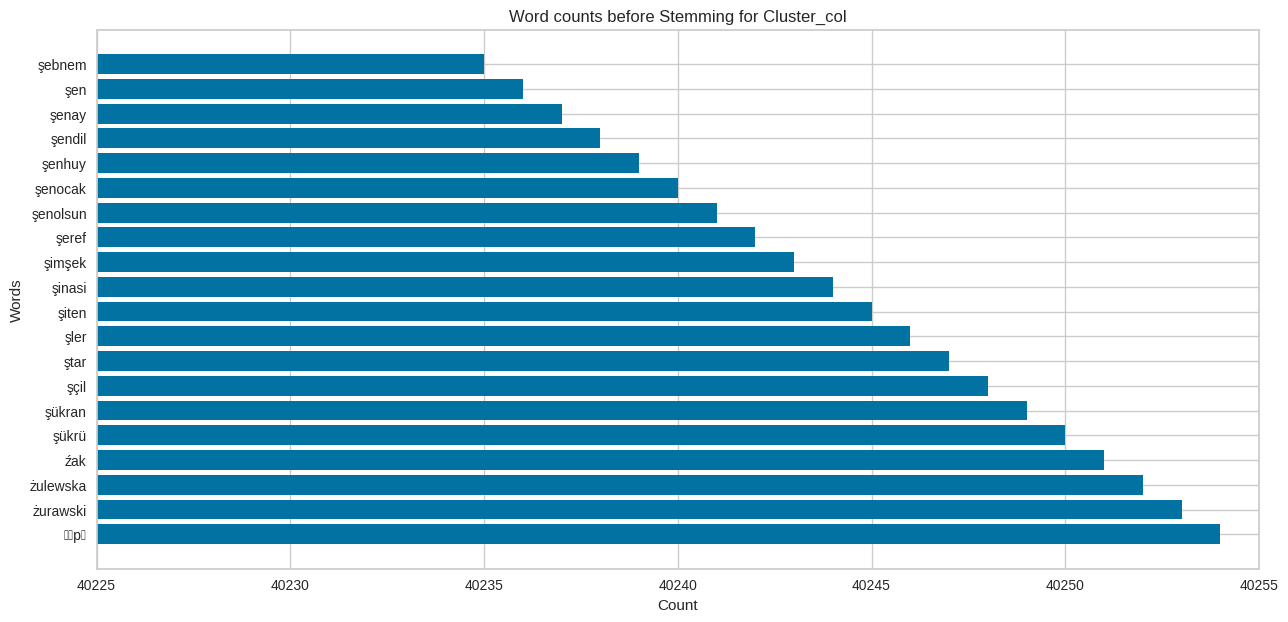

In [128]:
# Plotting top 10 words
plt.rcParams['figure.figsize'] = (15,7)
plt.xlim(40225,40255)
plt.title('Word counts before Stemming for Cluster_col')
displayTop20Words(df_cluster_before_stem)

##### Which text normalization technique have you used and why?

Stemming removes the extra tail of the words like coming converted to come. I am using this technique to remove the tail of the words.

In [129]:
#with stemming
# Stemming and assigning words to a variable
df_copy['cluster_col'] = df_copy['cluster_col'].apply(stemming)
dictionary_cluster_col = getVectorized(df_copy)
# Assigning vocabularies and counts to the lists for listed_in.
vocab_cluster , vocab_counts_cluster = assignWordsAndCountsToList(dictionary_cluster_col)
# Words and counts after stemming
df_cluster_after_stem = pd.DataFrame({'word':vocab_cluster,'count':vocab_counts_cluster}).sort_values(by='count',ascending=False)
df_cluster_after_stem.head(20).T


,21089,35984,34145,30960,17217,17215,24865,23307,19104,31776,15117,15153,35700,21984,18315,20269,20673,20314,25416,25104
word,ṣọpẹ,żurawski,żulewska,źak,şükrü,şükran,şçil,ştar,şler,şiten,şinasi,şimşek,şeref,şenolsun,şenocak,şenhuy,şendil,şenay,şen,şebnem
count,37258,37257,37256,37255,37254,37253,37252,37251,37250,37249,37248,37247,37246,37245,37244,37243,37242,37241,37240,37239


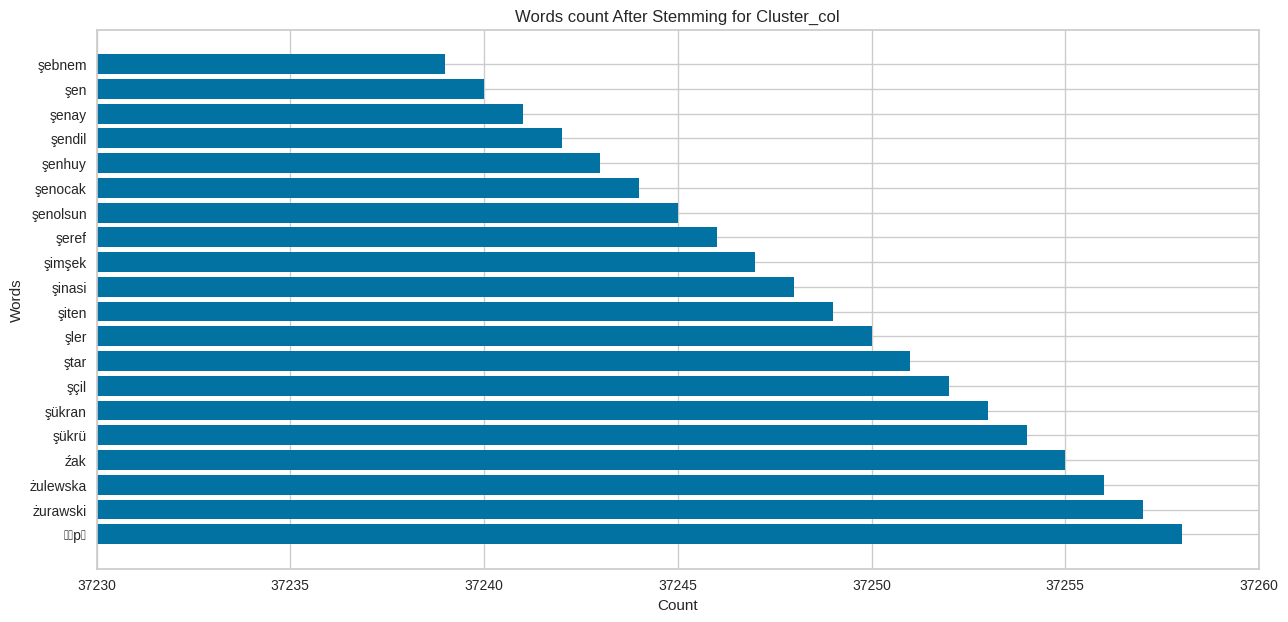

In [130]:
# Plotting top 10 words
plt.xlim(37230,37260)
plt.title('Words count After Stemming for Cluster_col')
displayTop20Words(df_cluster_after_stem)

#### 8. Text Vectorization

In [131]:
# Vectorizing Text
# Function to get number from proportion
def proportionToNumber(proportion,data):
  return (proportion * data)/100

num = int(round(proportionToNumber(1,len(df_copy)),0))
# Vectorizing Text - discarding features which are available less then 1% of the dataset and more than 90%.
tfidfvectorizer = TfidfVectorizer(min_df=num,max_df=.9)
features_array = tfidfvectorizer.fit_transform(df_copy['cluster_col']).toarray()
features_names = tfidfvectorizer.get_feature_names_out()
df_copy.shape

(6596, 13)

In [132]:
# Making dataframe with vocabularies
X = pd.DataFrame(features_array,columns=features_names)
X.shape

(6596, 396)

##### Which text vectorization technique have you used and why?

I used tfidfVectorization technique.

### 5.Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?


Given the extensive number of features, many of which predominantly contain zeros, there arises a need for dimensionality reduction.

In [133]:

# Dimensionality Reduction (If needed)
pca = PCA(n_components=.975)
pca.fit(X.values)
X2 = pca.transform(X.values)
len(X2[0])

364

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


I utilized Principal Component Analysis (PCA) to tackle the complexities posed by high-dimensional data. The reason for choosing PCA lies in the challenges that arise when dealing with a large number of dimensions, making it difficult to effectively visualize, analyze, and model the data. PCA proves valuable by reducing the dimensionality of the data while retaining the most significant variations, enabling a more efficient analysis and interpretation of the dataset.

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***